In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,Sequential,layers

In [2]:
data = datasets.mnist.load_data()

In [3]:
(x_train,y_train),(x_test,y_test) = data

In [4]:
x_train_normalize = x_train/255

In [5]:
x_test_normalize = x_test/255

In [6]:
y_train_flatten = y_train.flatten()

In [7]:
y_test_flatten = y_test.flatten()

In [8]:
x_train[0].shape

(28, 28)

In [9]:
cnn = Sequential([
    #convoltutional network
    layers.Conv2D(filters=3,activation='relu',kernel_size=(3,3),input_shape=(28,28,1)),
    #pooling layer
    layers.MaxPooling2D((2,2)),
    #another layer
    layers.Conv2D(filters=6,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    #dense network
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [10]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
cnn.fit(x_train_normalize,y_train_flatten,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2884 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1048 - accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0804 - accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0662 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0567 - accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0491 - accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0433 - accuracy: 0.9864
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0393 - accuracy: 0.9877
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0349 - accuracy: 0.9888
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.032

In [12]:
cnn.evaluate(x_test_normalize,y_test_flatten)

313/313 [==============================] - 1s 2ms/step - loss: 0.0415 - accuracy: 0.9873


[0.041503340005874634, 0.9872999787330627]

In [13]:
y_predict = cnn.predict(x_test_normalize)

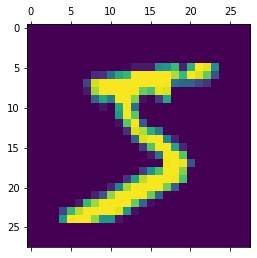

In [14]:
plt.matshow(x_train[0])

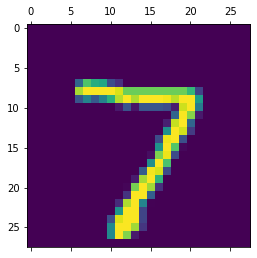

In [15]:
plt.matshow(x_test[0])

In [16]:
np.argmax(y_predict[0])

7

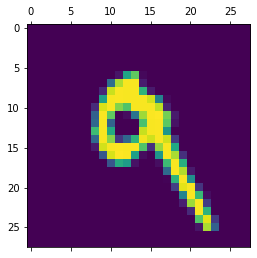

In [17]:
plt.matshow(x_test[7])

In [18]:
np.argmax(y_predict[7])

9

In [19]:
import pickle

In [20]:
pickle.dump(cnn,open('cnn_model','wb'))

INFO:tensorflow:Assets written to: ram://14042691-a940-4a0d-8193-fa575a54767a/assets
